In [135]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

df = pd.read_csv('./data.csv') # Removed few outlier points
df = df.fillna(-1)
getColumn = lambda col: list(filter(lambda n: n != -1, df[col].values))

In [136]:
# Discharge columns
dt1 = getColumn("discharge1_t")
di1 = getColumn("discharge1_c")
dv1 = getColumn("discharge1_v")

dt2 = getColumn("discharge2_t")
di2 = getColumn("discharge2_c")
dv2 = getColumn("discharge2_v")

dt3 = getColumn("discharge3_t")
di3 = getColumn("discharge3_c")
dv3 = getColumn("discharge3_v")

dt4 = getColumn("discharge4_t")
di4 = getColumn("discharge4_c")
dv4 = getColumn("discharge4_v")

dt5 = getColumn("discharge5_t")
di5 = getColumn("discharge5_c")
dv5 = getColumn("discharge5_v")

# Charge columns
ct1 = getColumn("charge1_t")
ci1 = getColumn("charge1_c")
cv1 = getColumn("charge1_v")

ct2 = getColumn("charge2_t")
ci2 = getColumn("charge2_c")
cv2 = getColumn("charge2_v")

ct3 = getColumn("charge3_t")
ci3 = getColumn("charge3_c")
cv3 = getColumn("charge3_v")

ct4 = getColumn("charge4_t")
ci4 = getColumn("charge4_c")
cv4 = getColumn("charge4_v")

ct5 = getColumn("charge5_t")
ci5 = getColumn("charge5_c")
cv5 = getColumn("charge5_v")

dts = [dt1, dt2, dt3, dt4, dt5]
dvs = [dv1, dv2, dv3, dv4, dv5]
dis = [di1, di2, di3, di4, di5]
cts = [ct1, ct2, ct3, ct4, ct5]
cvs = [cv1, cv2, cv3, cv4, cv5]
cis = [ci1, ci2, ci3, ci4, ci5]

In [137]:
irs = []

for j in range(5):
    irs.append(cvs[j][-1] / cis[j][-1])

IR = np.mean(irs)
print("IR = ", IR)

IR =  4.267221419150299


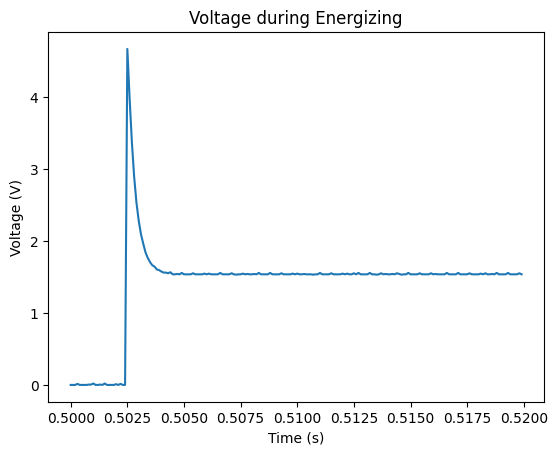

In [138]:
plt.plot(cts[0][5000:5200], cvs[0][5000:5200])
plt.title("Voltage during Energizing")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.show()

In [139]:
# Discharge columns
dt1 = getColumn("discharge1_t")[2757:2771]
di1 = getColumn("discharge1_c")[2757:2771]
dv1 = getColumn("discharge1_v")[2757:2771]

dt2 = getColumn("discharge2_t")[4811:4824]
di2 = getColumn("discharge2_c")[4811:4824]
dv2 = getColumn("discharge2_v")[4811:4824]

dt3 = getColumn("discharge3_t")[889:902]
di3 = getColumn("discharge3_c")[889:902]
dv3 = getColumn("discharge3_v")[889:902]

dt4 = getColumn("discharge4_t")[2614:2628]
di4 = getColumn("discharge4_c")[2614:2628]
dv4 = getColumn("discharge4_v")[2614:2628]

dt5 = getColumn("discharge5_t")[2836:2849]
di5 = getColumn("discharge5_c")[2836:2849]
dv5 = getColumn("discharge5_v")[2836:2849]

# Charge columns
ct1 = getColumn("charge1_t")[5027:5040]
ci1 = getColumn("charge1_c")[5027:5040]
cv1 = getColumn("charge1_v")[5027:5040]

ct2 = getColumn("charge2_t")[1759:1771]
ci2 = getColumn("charge2_c")[1759:1771]
cv2 = getColumn("charge2_v")[1759:1771]

ct3 = getColumn("charge3_t")[2702:2714]
ci3 = getColumn("charge3_c")[2702:2714]
cv3 = getColumn("charge3_v")[2702:2714]

ct4 = getColumn("charge4_t")[2948:2961]
ci4 = getColumn("charge4_c")[2948:2961]
cv4 = getColumn("charge4_v")[2948:2961]

ct5 = getColumn("charge5_t")[4853:4865]
ci5 = getColumn("charge5_c")[4853:4865]
cv5 = getColumn("charge5_v")[4853:4865]

dts = [dt1, dt2, dt3, dt4, dt5]
dvs = [dv1, dv2, dv3, dv4, dv5]
dis = [di1, di2, di3, di4, di5]
cts = [ct1, ct2, ct3, ct4, ct5]
cvs = [cv1, cv2, cv3, cv4, cv5]
cis = [ci1, ci2, ci3, ci4, ci5]

In [140]:
ds1 = pd.read_csv('./data.csv')

# DISCHARGE USING CURRENT 
d1 = np.polyfit(dt1, np.log(di1), 1)[0]
d2 = np.polyfit(dt2, np.log(di2), 1)[0]
d3 = np.polyfit(dt3, np.log(di3), 1)[0]
d4 = np.polyfit(dt4, np.log(di4), 1)[0]
d5 = np.polyfit(dt5, np.log(di5), 1)[0]

ir = 4.2718

discharge = - 14.2718 / np.array([d1, d2, d3, d4, d5])
print(discharge)

# CHARGE USING CURRENT
#( (ln(I) - ln(I0) ) / I0 ) / t = R / L
c1 = np.polyfit(ct1[:-1], np.log((ci1[-1]-ci1[:-1])/ci1[-1]), 1)[0]
c2 = np.polyfit(ct2[:-1], np.log((ci2[-1]-ci2[:-1])/ci2[-1]), 1)[0]
c3 = np.polyfit(ct3[:-1], np.log((ci3[-1]-ci3[:-1])/ci3[-1]), 1)[0]
c4 = np.polyfit(ct4[:-1], np.log((ci4[-1]-ci4[:-1])/ci4[-1]), 1)[0]
c5 = np.polyfit(ct5[:-1], np.log((ci5[-1]-ci5[:-1])/ci5[-1]), 1)[0]
charge = -14.2718 / np.array([c1, c2, c3, c4, c5])
print(charge)


[0.00491014 0.0048503  0.00486465 0.00483768 0.00484718]
[0.00380687 0.00356389 0.00381198 0.00354745 0.00381106]


0.00514107320733914 0.00043273407732045385
0.004996885695202363 4.4243648358577096e-05
0.005068979451270751


/var/folders/g6/t2m0rznn3h326jx3qv9b8lxm0000gq/T/ipykernel_75399/3946302110.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


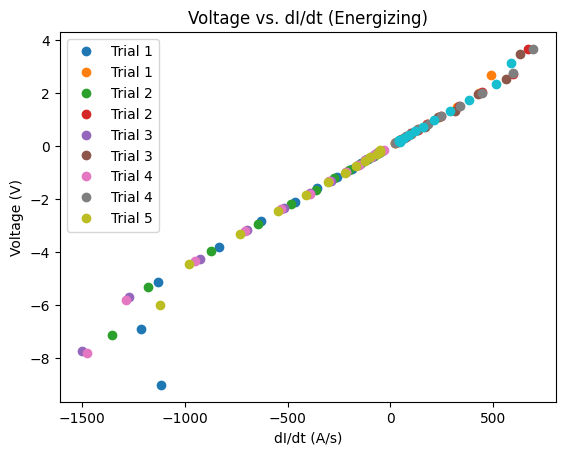

In [141]:
def getInductance(t, i, v, ind):
    v_ = v.copy()
    dIdt = np.gradient(i, t[1] - t[0])
    for j in range(len(v)):
        v_[j] -= IR * i[j]
    z = np.polyfit(dIdt, v_, 1)
    plt.title("Voltage vs. dI/dt (Energizing)")
    plt.xlabel("dI/dt (A/s)")
    plt.ylabel("Voltage (V)")
    plt.legend()
    plt.plot(dIdt, v_, 'o', label=f"Trial {ind + 1}")
    return z[0]

ic = []
id = []

# plt.show()

for i in range(5):
    id.append(getInductance(dts[i], dis[i], dvs[i], i))
    ic.append(getInductance(cts[i], cis[i], cvs[i], i))

print(np.mean(id), np.std(id))
print(np.mean(ic), np.std(ic))
print((np.mean(id) + np.mean(ic)) / 2)